In [1]:
import pandas as pd
import numpy as np
import multiprocessing
from bs4 import BeautifulSoup as bs
from selectolax.parser import HTMLParser
import re
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.text import Tokenizer
from time import time  # To time our operations
from collections import defaultdict, Counter  # For word frequency

import collections
import pathlib

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import os
import re
import shutil
import string



print(tf.__version__)

# import logging  # Setting up the loggings to monitor gensim
# logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import warnings
warnings.filterwarnings('ignore')

2.12.0


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
 
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/adwiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/adwiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# from subprocess import check_output
# print(check_output(["ls", "../datasets/"]).decode("utf8"))

In [5]:
def read_train_data():
    data = pd.read_json('../datasets/dataset.json')
    mapping = {False: 0, True: 1}
    data.replace({'hasBadWords': mapping}, inplace=True)
    data.rename(columns={"hasBadWords": "labels"}, inplace=True)
    data.rename(columns={"text": "raw_text"}, inplace=True)
    data.drop(['violation'], axis=1, inplace=True)
    print('Data size %d' % len(data))
    print('Data headers %s' % data.columns.values)
    return data

# Preprocessing function

In [6]:
data = read_train_data()

Data size 86439
Data headers ['raw_text' 'labels']


In [7]:
# def preprocess(text, stop_words, punctuation_marks): #, morph):
#     tokens = word_tokenize(text.lower())
#     preprocessed_text = []
#     for token in tokens:
#         if token not in punctuation_marks:
#             lemma = token #morph.parse(token)[0].normal_form
#             if lemma not in stop_words:
#                 preprocessed_text.append(lemma)
#     return ' '.join(preprocessed_text)

# punctuation_marks = ['!', ',', ';', ':', '(', ')', '-', '--', '?', '@', '....', '~',
#                      '.', '..', '...', '....................', '<', '>', '=', '»', '|', '’', '`', '+', '$',
#                      '&', '#', '+++', '*', '``', '%', '[', ']', '{', '}', '√©', '®']

# stop_words = stopwords.words('english') + ['14000kbps', 'november', '1080p', '4k', 'mp4', 'error', '404', '2022']
# morph = pymorphy2.MorphAnalyzer(lang='uk')

In [8]:
# function to clean and pre-process the text.
def clean_text(text):  
    
    # 1. Removing html tags
    text = bs(text,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    text = re.sub("[^a-zA-Z]"," ", text)
    
    # 3. Converting to lower case and splitting
    word_tokens= text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english")+ ['14000kbps', 'november', '1080p', 'email', 
                                                 '4k', 'mp4', 'error', '404', '2022'])     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [9]:
data['text'] = data.apply(lambda row: clean_text(row.raw_text), axis=1)

In [10]:
data.head()

,raw_text,labels,text
0,My Favorite Slut,0,favorite slut
1,girlfriends sit on each other's faces with the...,0,girlfriend sit face ass
2,bound beauty kisses her girlfriend,0,bound beauty kiss girlfriend
3,MORGAN - Anytime - Nail Painting On The Slave'...,0,morgan anytime nail painting slave face
4,TRANSGENDER COACHING (wmv) PART 1,0,transgender coaching wmv part


In [11]:
data = data[['text', 'labels']]#, 'raw_text']] # columns reorder

In [12]:
data.head()

,text,labels
0,favorite slut,0
1,girlfriend sit face ass,0
2,bound beauty kiss girlfriend,0
3,morgan anytime nail painting slave face,0
4,transgender coaching wmv part,0


In [13]:
# data.to_csv('../datasets/clear_text.csv', index=False)
# data.to_csv('../datasets/bw/1.txt', sep=' ', index=False, header=False)

In [14]:
# csv_file = tf.keras.utils.get_file('clear_text.csv', origin='file:////Users/adwiz/Documents/Courses/datascience_skillbox/datasets/clear_text.csv')

In [15]:
# df = pd.read_csv(csv_file, index_col=0)

In [16]:
# df.head()

In [17]:
# df.dtypes

In [18]:
# positive_texts = df[df['labels'] == 0]

In [19]:
# negative_texts = df[df['labels'] == 1]

In [20]:
# positive_texts.head()

In [21]:
# negative_texts.head()

# Tensorflow

In [22]:
# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [23]:
counter = counter_word(data.text)

In [24]:
vocab_size = num_unique_words = len(counter)
oov_token = '<UNK>'

In [25]:
window_size = 3

positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
      data.text,
      vocabulary_size=vocab_size,
      window_size=window_size,
      negative_samples=1)

negative_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
      data.text,
      vocabulary_size=vocab_size,
      window_size=window_size,
      negative_samples=0)
    
print(f'Positive skip_grams {len(positive_skip_grams)}')
print(f'Negative skip_grams {len(negative_skip_grams)}')

Positive skip_grams 940416
Negative skip_grams 470208


In [26]:
num_unique_words

52659

In [27]:
counter

Counter({'favorite': 441,
         'slut': 3009,
         'girlfriend': 715,
         'sit': 790,
         'face': 7550,
         'ass': 352,
         'bound': 2074,
         'beauty': 765,
         'kiss': 1011,
         'morgan': 274,
         'anytime': 76,
         'nail': 1584,
         'painting': 117,
         'slave': 7865,
         'transgender': 124,
         'coaching': 8,
         'wmv': 2147,
         'part': 3139,
         'terra': 277,
         'kept': 99,
         'tied': 2231,
         'gagged': 1789,
         'garage': 26,
         'cadence': 94,
         'get': 6951,
         'catfished': 3,
         'mobile': 328,
         'lick': 1851,
         'sexy': 7186,
         'mule': 171,
         'clean': 838,
         'shoe': 5316,
         'worship': 8710,
         'domination': 10362,
         'gorgeous': 672,
         'yet': 253,
         'hangry': 2,
         'amazonian': 23,
         'bianca': 113,
         'v': 866,
         'zac': 12,
         'comp': 26,
         

In [28]:
counter.most_common(150)

[('foot', 40360),
 ('fetish', 26751),
 ('clip', 19402),
 ('as', 13295),
 ('video', 13142),
 ('girl', 12521),
 ('big', 10888),
 ('domination', 10362),
 ('store', 9679),
 ('cum', 9484),
 ('worship', 8710),
 ('cock', 8055),
 ('bondage', 8010),
 ('slave', 7865),
 ('face', 7550),
 ('heel', 7507),
 ('sexy', 7186),
 ('female', 7086),
 ('get', 6951),
 ('pussy', 6791),
 ('femdom', 6740),
 ('high', 6627),
 ('balloon', 6503),
 ('woman', 6188),
 ('toe', 6123),
 ('leg', 5951),
 ('sex', 5755),
 ('tit', 5650),
 ('humiliation', 5643),
 ('pantyhose', 5563),
 ('sol', 5515),
 ('shoe', 5316),
 ('boot', 5308),
 ('mistress', 5179),
 ('stocking', 5137),
 ('blow', 5093),
 ('like', 4923),
 ('play', 4909),
 ('time', 4856),
 ('pov', 4779),
 ('amateur', 4726),
 ('goddess', 4691),
 ('hot', 4634),
 ('want', 4557),
 ('make', 4538),
 ('milf', 4496),
 ('panty', 4449),
 ('sock', 4447),
 ('fart', 4445),
 ('tickling', 4374),
 ('fuck', 4366),
 ('fucking', 4336),
 ('crush', 4329),
 ('mouth', 4312),
 ('hand', 4286),
 ('love

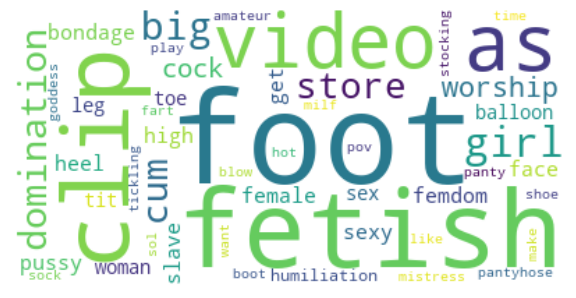

In [29]:
from wordcloud import *
word_freq = [i for i in counter.most_common(50)]
wd = WordCloud(background_color='white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
SEED = 42

In [31]:
train_size = int(data.shape[0] * .8)

train = data[:train_size]
val = data[train_size:]

# Split train and test

X_train = train.text.to_numpy()
y_train = train.labels.to_numpy()

X_val = val.text.to_numpy()
y_val = val.labels.to_numpy()

In [32]:
X_train[10]

'morgan anytime lick sexy mule clean shoe worship domination'

In [33]:
X_train,  y_train

(array(['favorite slut', 'girlfriend sit face ass',
        'bound beauty kiss girlfriend', ..., 'strict nurse uniform com',
        '', ''], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]))

In [34]:
X_train.shape, X_val.shape

((69151,), (17288,))

# Tokenize

In [35]:
# vectorize a text corpus by turning each text into sentence of integers

tokenizer = Tokenizer(num_words=num_unique_words, oov_token=oov_token)
tokenizer.fit_on_texts(data['text'])

In [36]:
import pickle

# saving
with open('../models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('../models/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [37]:
# each word have a unique index
word_index = tokenizer.word_index
word_index['<pad>'] = 0  # add a padding token
word_index

{'<UNK>': 1,
 'foot': 2,
 'fetish': 3,
 'clip': 4,
 'as': 5,
 'video': 6,
 'girl': 7,
 'big': 8,
 'domination': 9,
 'store': 10,
 'cum': 11,
 'worship': 12,
 'cock': 13,
 'bondage': 14,
 'slave': 15,
 'face': 16,
 'heel': 17,
 'sexy': 18,
 'female': 19,
 'get': 20,
 'pussy': 21,
 'femdom': 22,
 'high': 23,
 'balloon': 24,
 'woman': 25,
 'toe': 26,
 'leg': 27,
 'sex': 28,
 'tit': 29,
 'humiliation': 30,
 'pantyhose': 31,
 'sol': 32,
 'shoe': 33,
 'boot': 34,
 'mistress': 35,
 'stocking': 36,
 'blow': 37,
 'like': 38,
 'play': 39,
 'time': 40,
 'pov': 41,
 'amateur': 42,
 'goddess': 43,
 'hot': 44,
 'want': 45,
 'make': 46,
 'milf': 47,
 'panty': 48,
 'sock': 49,
 'fart': 50,
 'tickling': 51,
 'fuck': 52,
 'fucking': 53,
 'crush': 54,
 'mouth': 55,
 'hand': 56,
 'love': 57,
 'see': 58,
 'black': 59,
 'orgasm': 60,
 'farting': 61,
 'job': 62,
 'tease': 63,
 'one': 64,
 'smoking': 65,
 'long': 66,
 'full': 67,
 'masturbation': 68,
 'spanking': 69,
 'hd': 70,
 'take': 71,
 'hard': 72,
 'dir

In [38]:
inverse_vocab = {index: token for token, index in word_index.items()}
print(inverse_vocab)

{1: '<UNK>', 2: 'foot', 3: 'fetish', 4: 'clip', 5: 'as', 6: 'video', 7: 'girl', 8: 'big', 9: 'domination', 10: 'store', 11: 'cum', 12: 'worship', 13: 'cock', 14: 'bondage', 15: 'slave', 16: 'face', 17: 'heel', 18: 'sexy', 19: 'female', 20: 'get', 21: 'pussy', 22: 'femdom', 23: 'high', 24: 'balloon', 25: 'woman', 26: 'toe', 27: 'leg', 28: 'sex', 29: 'tit', 30: 'humiliation', 31: 'pantyhose', 32: 'sol', 33: 'shoe', 34: 'boot', 35: 'mistress', 36: 'stocking', 37: 'blow', 38: 'like', 39: 'play', 40: 'time', 41: 'pov', 42: 'amateur', 43: 'goddess', 44: 'hot', 45: 'want', 46: 'make', 47: 'milf', 48: 'panty', 49: 'sock', 50: 'fart', 51: 'tickling', 52: 'fuck', 53: 'fucking', 54: 'crush', 55: 'mouth', 56: 'hand', 57: 'love', 58: 'see', 59: 'black', 60: 'orgasm', 61: 'farting', 62: 'job', 63: 'tease', 64: 'one', 65: 'smoking', 66: 'long', 67: 'full', 68: 'masturbation', 69: 'spanking', 70: 'hd', 71: 'take', 72: 'hard', 73: 'dirty', 74: 'lesbian', 75: 'anal', 76: 'bubble', 77: 'crushing', 78: 'b

In [39]:
# Get target and context words for one positive skip-gram.
target_word, context_word = positive_skip_grams[0]

# Set the number of negative samples per positive context.
num_ns = 4

context_class = tf.reshape(tf.constant(context_word, dtype="int64"), (1, 1))
negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
    true_classes=context_class,  # class that should be sampled as 'positive'
    num_true=1,  # each positive skip-gram has 1 positive context class
    num_sampled=num_ns,  # number of negative context words to sample
    unique=True,  # all the negative samples should be unique
    range_max=vocab_size,  # pick index of the samples from [0, vocab_size]
    seed=SEED,  # seed for reproducibility
    name="negative_sampling"  # name of this operation
)
print(negative_sampling_candidates)
print([inverse_vocab[index.numpy()] for index in negative_sampling_candidates])

Metal device set to: Apple M2
tf.Tensor([ 828   50 6504  200], shape=(4,), dtype=int64)
['told', 'fart', 'blondi', 'nail']


In [42]:
target_word

'foot fetish handjobs sol foot slave training foot joi stella liberty jax foot job foot job hand job hand job femdom footjob femdom fj fj femdom foot milf foot foot fetish foot job sol fetish bdsm'

In [40]:
# Add a dimension so you can use concatenation (in the next step).
negative_sampling_candidates = tf.expand_dims(negative_sampling_candidates, 1)

# Concatenate a positive context word with negative sampled words.
context = tf.concat([context_class, negative_sampling_candidates], 0)

# Label the first context word as `1` (positive) followed by `num_ns` `0`s (negative).
label = tf.constant([1] + [0]*num_ns, dtype="int64")

# Reshape the target to shape `(1,)` and context and label to `(num_ns+1,)`.
target = tf.squeeze(target_word)
context = tf.squeeze(context)
label = tf.squeeze(label)

In [41]:
print(f"target_index    : {target}")
print(f"target_word     : {inverse_vocab[target_word]}")
print(f"context_indices : {context}")
print(f"context_words   : {[inverse_vocab[c.numpy()] for c in context]}")
print(f"label           : {label}")

target_index    : b'foot fetish handjobs sol foot slave training foot joi stella liberty jax foot job foot job hand job hand job femdom footjob femdom fj fj femdom foot milf foot foot fetish foot job sol fetish bdsm'


KeyError: 'foot fetish handjobs sol foot slave training foot joi stella liberty jax foot job foot job hand job hand job femdom footjob femdom fj fj femdom foot milf foot foot fetish foot job sol fetish bdsm'

In [ ]:
print("target  :", target)
print("context :", context)
print("label   :", label)

In [ ]:
tokenizer = tf_text.UnicodeScriptTokenizer()

def tokenize(text, unused_label):
    lower_case = tf_text.case_fold_utf8(text)
    return tokenizer.tokenize(lower_case)

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

In [ ]:
print(X_train[:3])
print(X_train_sequences[:3])

In [ ]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(num_unique_words, 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_sequences, epochs=15,
                    validation_data=X_val_sequences,
                    validation_steps=30)